In [67]:
import pandas as pd
import os
from datetime import datetime
import numpy as np

def read_one_user(n):
    user_path = '../Data/0'+str(n)+'/labels.txt'
    transport_df = pd.read_csv(user_path, sep="\t")
    
    directory = '../Data/0'+str(n)+'/Trajectory'
    
    gps_points_df = pd.DataFrame(columns=['time', 'lat', 'lon', 'alt', 'identifier'])
    for filename in os.listdir(directory):
        dt_object = datetime.strptime(filename[:-4], '%Y%m%d%H%M%S')
        for index, row in transport_df.iterrows():
            start = datetime.strptime(row['Start Time'],'%Y/%m/%d %H:%M:%S')
            end = datetime.strptime(row['End Time'],'%Y/%m/%d %H:%M:%S')
            if dt_object >= start and dt_object <= end:
                # turn all gps points into df
                # append to general df
                # set index as identifier
                
                file_df = pd.read_csv(directory+'/'+filename, skiprows=6, header=None,
                         parse_dates=[[5, 6]], infer_datetime_format=True)
                file_df.rename(inplace=True, columns={'5_6': 'time', 0: 'lat', 1: 'lon', 3: 'alt'})
                file_df.drop(inplace=True, columns=[2, 4])
                file_df['identifier'] = index
                gps_points_df = pd.concat([gps_points_df,file_df])
                
    return transport_df,gps_points_df

transport_df,gps_points_df = read_one_user(10)
transport_df,gps_points_df

(              Start Time             End Time Transportation Mode
 0    2007/06/26 11:32:29  2007/06/26 11:40:29                 bus
 1    2008/03/28 14:52:54  2008/03/28 15:59:59               train
 2    2008/03/28 16:00:00  2008/03/28 22:02:00               train
 3    2008/03/29 01:27:50  2008/03/29 15:59:59               train
 4    2008/03/29 16:00:00  2008/03/30 15:59:59               train
 ..                   ...                  ...                 ...
 429  2008/12/07 10:30:54  2008/12/07 10:34:14                taxi
 430  2008/12/07 10:59:29  2008/12/07 11:29:48               train
 431  2008/12/07 11:43:12  2008/12/07 12:23:26                 bus
 432  2008/12/07 12:23:34  2008/12/07 12:25:07                walk
 433  2008/12/07 12:25:34  2008/12/07 12:37:28                taxi
 
 [434 rows x 3 columns],
                      time        lat         lon   alt identifier
 0     2008-03-28 16:00:01   39.50293  116.714948  -777          2
 1     2008-03-28 16:01:00  39.4970

[2 4 5 7 15 18 24 29 30 31 36 37 38 41 53 58 65 73 75 77 85 88 90 103 112
 120 124 129 136 143 146 155 158 163 167 172 177 184 189 192 196 204 208
 212 217 221 227 248 259 265 280 286 292 296 302 307 313 318 326 331 336
 341 345 351 353 354 357 361 367 372 380 384 389 391 392 395 397 402 407
 415 417 418 427]
2


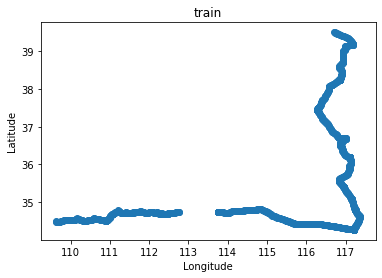

4


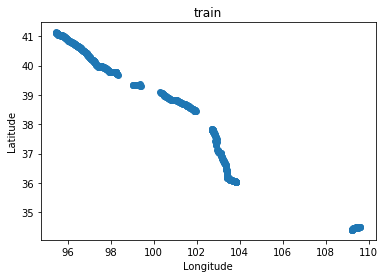

5


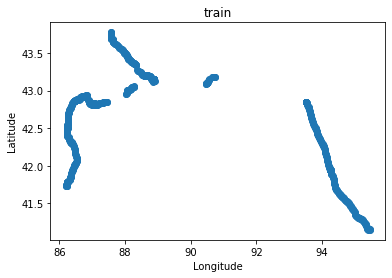

7


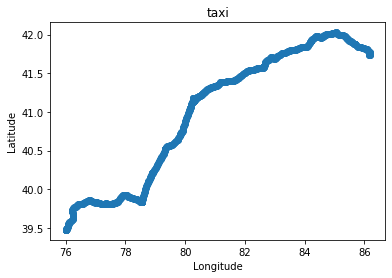

15


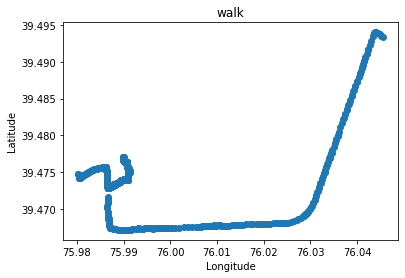

In [74]:
import matplotlib.pyplot as plt

def draw_motif(transport_df,gps_points_df):
    ids = gps_points_df['identifier'].unique()
    print(ids)
    for i in ids[:5]:
        print(i)
        single_mode_df = gps_points_df[gps_points_df['identifier']==i]
        plt.scatter(x=single_mode_df['lon'], y=single_mode_df['lat'], edgecolors='face')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.title(transport_df.at[i,'Transportation Mode'])
        plt.show()
        
draw_motif(transport_df,gps_points_df)